## GENERAL STUFF: IMPORTING PACKAGES AND READING IN DATA FOR ANALYSIS ##

In [36]:
## Importing packages ##
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import pandas as pd 
import openpyxl 

In [37]:
file_path = '/Users/epalmer/MET4400C_Ins-obs_labs/Labs/Lab_1_files/Data_L1/Full_lab_1_20260116.xlsx'
col_names = ['Time']+[f'Group {i}' for i in range(1,6+1)]
data = pd.read_excel(file_path, sheet_name = 0 , names=col_names)

In [38]:
## Creating data for temp, RH, Wind speed
RH = data[18:28+1]
Temp = data[5:15+1]
wind = data[31:41+1]

In [39]:
time0 = np.datetime64('2026-01-16T11:50') #start time of data recording (1/16/2026 11:50 AM)
timesteps = 3 #time between observations in minutes
numbertimesteps = 11 #number of time steps recorded
time = np.array([time0 + np.timedelta64(timesteps*i,'m') for i in range(numbertimesteps)])

## Part 5a Plots for temperature, Rel. Humidity, and wind speed for GROUP 2 ##

In [40]:
group = 'Group 2'
Tgrp, RHgrp, windgrp = Temp[group].values, RH[group].values, wind[group].values
print (f'Temperature values for {group}: {Tgrp} \u00B0C')
print (f'Relative Humidity values for {group}: {RHgrp} %')
print (f'Wind Speed values for {group}: {windgrp} m/s')

Temperature values for Group 2: [10.8 9.3 10.3 10.4 9.7 10.5 10.1 10.2 9.9 11 11.6] °C
Relative Humidity values for Group 2: [41.8 37.6 40.4 39.6 38.5 39.8 37.8 37.6 40.6 39 38.7] %
Wind Speed values for Group 2: [0.7 1.4 0.6 0 0.3 0 1.4 0.4 0.5 0 0] m/s


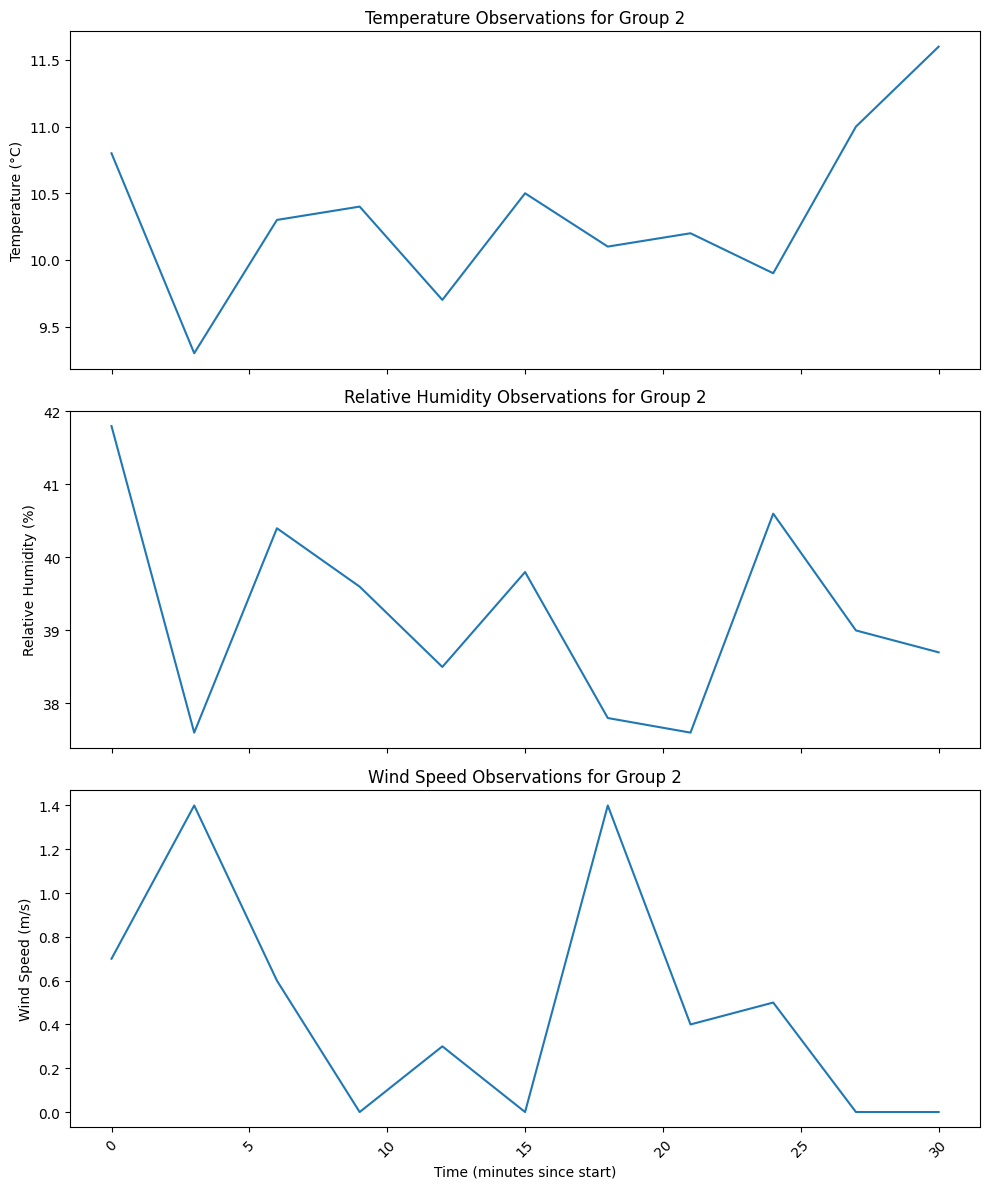

In [41]:
#making time values for x axis nicer (minutes between starting time)
x_values = np.array([timesteps*i for i in range(numbertimesteps)]) # 3 * (1, 2, 3,....10) bc range is 1-10
#Plotting data
fig, axes = plt.subplots(3, figsize=(10,12), sharex=True)
axes[0].plot(x_values, Tgrp)
axes[1].plot(x_values, RHgrp)
axes[2].plot(x_values, windgrp)
## Setting titles and labels ##
axes[0].set_title(f'Temperature Observations for {group}')
axes[0].set_ylabel('Temperature (\u00B0C)')
axes[1].set_title(f'Relative Humidity Observations for {group}')
axes[1].set_ylabel('Relative Humidity (%)')
axes[2].set_title(f'Wind Speed Observations for {group}')
axes[2].set_ylabel('Wind Speed (m/s)')
axes[2].set_xlabel('Time (minutes since start)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5b. Calculating the MEAN, STD, and UNCERTAINTY for GROUP 2

In [42]:
## Creating a function to calculate the sample mean ##
def sample_mean(data):
    """ Calculate the sample mean of the provided data
    
    Parameters: 
    data (array-like): 1 D array
    Values to be averaged 
    
    Returns:
    mean: as a float
    mean of the data provided """
    N = len(data)
    sum = np.sum(data)
    mean = sum / N
    return mean

In [43]:
## Function for calculating the sample standard deviation ##
def sample_std(data):
    """Calculate the Sample Standard devation of the provided data 
    
    Parameters:
    data (array-like): 1 D array
    Values to calculate the standard deviation
    
    Returns:
    std: as a float
    standard deviation of the provided data """

    N = len(data)
    mean = sample_mean(data)
    samp_mean_diff_sq = np.sum((data-mean)**2)
    std = np.sqrt(samp_mean_diff_sq / (N-1))
    return std 

In [44]:
## Function for calculating the std error ##
def std_error(data):
    """Calculate the Standard Error of the provided data

    Parameters:
    data (array-like): 1 D array
    Values to calculate the standard error

    Returns:
    std_error: as a float
    standard error of the provided data """
    
    N = len(data)
    std = sample_std(data)
    std_error = std / np.sqrt(N)
    return std_error


In [45]:
### Calculating mean, std, and std error for group 2 data ###
mean_T = sample_mean(Tgrp)
std_T = sample_std(Tgrp)
se_T = std_error(Tgrp)
print ("Temp Statistics:")
print (f'Mean Temperature for {group}: {mean_T:.2f} \u00B0C')
print (f'Standard Deviation of Temperature for {group}: {std_T:.2f} \u00B0C')
print (f'Standard Error of Temperature for {group}: {se_T:.2f} \u00B0C')
print ('-'*50)
mean_RH = sample_mean(RHgrp)
std_RH = sample_std(RHgrp)
se_RH = std_error(RHgrp)
print ("Relative Humidity Statistics:")
print (f'Mean Relative Humidity for {group}: {mean_RH:.2f} %')
print (f'Standard Deviation of Relative Humidity for {group}: {std_RH:.2f} %')
print (f'Standard Error of Relative Humidity for {group}: {se_RH:.2f} %')
print ('-'*50)
mean_wind = sample_mean(windgrp)
std_wind = sample_std(windgrp)
se_wind = std_error(windgrp)
print ("Wind Speed Statistics:")
print (f'Mean Wind Speed for {group}: {mean_wind:.2f} m/s')
print (f'Standard Deviation of Wind Speed for {group}: {std_wind:.2f} m/s')
print (f'Standard Error of Wind Speed for {group}: {se_wind:.2f} m/s')


Temp Statistics:
Mean Temperature for Group 2: 10.35 °C
Standard Deviation of Temperature for Group 2: 0.63 °C
Standard Error of Temperature for Group 2: 0.19 °C
--------------------------------------------------
Relative Humidity Statistics:
Mean Relative Humidity for Group 2: 39.22 %
Standard Deviation of Relative Humidity for Group 2: 1.36 %
Standard Error of Relative Humidity for Group 2: 0.41 %
--------------------------------------------------
Wind Speed Statistics:
Mean Wind Speed for Group 2: 0.48 m/s
Standard Deviation of Wind Speed for Group 2: 0.52 m/s
Standard Error of Wind Speed for Group 2: 0.16 m/s


## 5c. Calculating the MEAN, STD, and UNCERTAINTY for all RURAL groups

In [46]:
RH_rural = RH[['Group 1', 'Group 2', 'Group 3']].values.ravel()
Temp_rural = Temp[['Group 1', 'Group 2', 'Group 3']].values.ravel()
wind_rural = wind[['Group 1', 'Group 2', 'Group 3']].values.ravel()

In [47]:
## Calculating mean, std, and std error for rural data ##
mean_T_rural = sample_mean(Temp_rural)
std_T_rural = sample_std(Temp_rural)
se_T_rural = std_error(Temp_rural)
print('Temp Rural Statistics:')
print(f'Mean Temperature for Rural: {mean_T_rural:.2f} \u00B0C')
print(f'Standard Deviation of Temperature for Rural: {std_T_rural:.2f} \u00B0C')
print(f'Standard Error of Temperature for Rural: {se_T_rural:.2f} \u00B0C')
print('-'*50)
mean_RH_rural = sample_mean(RH_rural)
std_RH_rural = sample_std(RH_rural)
se_RH_rural = std_error(RH_rural)
print('Relative Humidity Rural Statistics:')
print(f'Mean Relative Humidity for Rural: {mean_RH_rural:.2f} %')
print(f'Standard Deviation of Relative Humidity for Rural: {std_RH_rural:.2f} %')
print(f'Standard Error of Relative Humidity for Rural: {se_RH_rural:.2f} %')
print('-'*50)
mean_wind_rural = sample_mean(wind_rural)
std_wind_rural = sample_std(wind_rural)
se_wind_rural = std_error(wind_rural)
print('Wind Speed Rural Statistics:')
print(f'Mean Wind Speed for Rural: {mean_wind_rural:.2f} m/s')
print(f'Standard Deviation of Wind Speed for Rural: {std_wind_rural:.2f} m/s')
print(f'Standard Error of Wind Speed for Rural: {se_wind_rural:.2f} m/s')

Temp Rural Statistics:
Mean Temperature for Rural: 11.46 °C
Standard Deviation of Temperature for Rural: 1.51 °C
Standard Error of Temperature for Rural: 0.26 °C
--------------------------------------------------
Relative Humidity Rural Statistics:
Mean Relative Humidity for Rural: 36.59 %
Standard Deviation of Relative Humidity for Rural: 5.75 %
Standard Error of Relative Humidity for Rural: 1.00 %
--------------------------------------------------
Wind Speed Rural Statistics:
Mean Wind Speed for Rural: 0.63 m/s
Standard Deviation of Wind Speed for Rural: 0.63 m/s
Standard Error of Wind Speed for Rural: 0.11 m/s


## 5d. Calculating the MEAN, STD, and UNCERTAINTY for all URBAN sites

In [48]:
Temp_urban = Temp[['Group 4', 'Group 5', 'Group 6']].values.ravel()
RH_urban = RH[['Group 4', 'Group 5', 'Group 6']].values.ravel()
wind_urban = wind[['Group 4', 'Group 5', 'Group 6']].values.ravel()
## Calculating mean, std, and std error for urban data ##
mean_T_urban = sample_mean(Temp_urban)
std_T_urban = sample_std(Temp_urban)
se_T_urban = std_error(Temp_urban)
print('Temp Urban Statistics:')
print(f'Mean Temperature for Urban: {mean_T_urban:.2f} \u00B0C')
print(f'Standard Deviation of Temperature for Urban: {std_T_urban:.2f} \u00B0C')
print(f'Standard Error of Temperature for Urban: {se_T_urban:.2f} \u00B0C') 
print('-'*50)
mean_RH_urban = sample_mean(RH_urban)
std_RH_urban = sample_std(RH_urban)
se_RH_urban = std_error(RH_urban)
print('Relative Humidity Urban Statistics:')
print(f'Mean Relative Humidity for Urban: {mean_RH_urban:.2f} %')
print(f'Standard Deviation of Relative Humidity for Urban: {std_RH_urban:.2f} %')
print(f'Standard Error of Relative Humidity for Urban: {se_RH_urban:.2f} %')
print('-'*50)
mean_wind_urban = sample_mean(wind_urban)
std_wind_urban = sample_std(wind_urban)
se_wind_urban = std_error(wind_urban)
print('Wind Speed Urban Statistics:')
print(f'Mean Wind Speed for Urban: {mean_wind_urban:.2f} m/s')
print(f'Standard Deviation of Wind Speed for Urban: {std_wind_urban:.2f} m/s')
print(f'Standard Error of Wind Speed for Urban: {se_wind_urban:.2f} m/s')

Temp Urban Statistics:
Mean Temperature for Urban: 12.05 °C
Standard Deviation of Temperature for Urban: 2.01 °C
Standard Error of Temperature for Urban: 0.35 °C
--------------------------------------------------
Relative Humidity Urban Statistics:
Mean Relative Humidity for Urban: 32.88 %
Standard Deviation of Relative Humidity for Urban: 8.36 %
Standard Error of Relative Humidity for Urban: 1.46 %
--------------------------------------------------
Wind Speed Urban Statistics:
Mean Wind Speed for Urban: 0.83 m/s
Standard Deviation of Wind Speed for Urban: 0.55 m/s
Standard Error of Wind Speed for Urban: 0.10 m/s


## 5e. Assessing the difference between urban and rural sites and if it is statistically significant 

In [49]:
def z_score (rural_data, urban_data):
    """Calculate the z-score between rural and urban data 
    
    Parameters:
    rural_data (array-like): 1 D array
    Values collected from rural locations
    urban_data (array-like): 1 D array
    Values collected from urban locations 
    
    Returns: 
    z_score: as a float
    z-score between rural and urban data """

    observed = sample_mean(urban_data)
    expected = sample_mean(rural_data)
    uncertainty = np.sqrt(std_error(urban_data)**2 + std_error(rural_data)**2)
    z_score = np.abs((observed-expected)/uncertainty)
    return z_score 

In [50]:
#z scores for urban vs rural data for all variables (temp, RH, wind)
z_temp = z_score(Temp_rural, Temp_urban)
z_RH = z_score(RH_rural, RH_urban)
z_wind = z_score(wind_rural, wind_urban)
significant = 2  # significant value for 95% confidence interval is 2 

# Code for temp and Z-score test
print('Z-Score for Urban vs Rural Data for Temperature:', f'{z_temp:.1f}')
if z_temp > significant: print('There is a significant difference between urban and rural temperature data (reject null hypothesis)')
else: print('There is no significant difference between urban and rural temperature data at 95% confidence')
print ('-'*100)
# Code for RH and Z-score test
print('Z-Score for Urban vs Rural Data for Relative Humidity:', f'{z_RH:.1f}')
if z_RH >significant: print('There is a significant difference between urban and rural relative humidity data (reject null hypothesis)')
else: print('There is no significant difference between urban and rural relative humidity data at 95% confidence')
print ('-'*100)
# Code for wind speed and Z-score test
print('Z-Score for Urban vs Rural Data for Wind Speed:', f'{z_wind:.1f}')
if z_wind > significant: print('There is a significant difference between urban and rural wind speed data (reject null hypothesis)')
else: print('There is no significant difference between urban and rural wind speed data at 95% confidence')

Z-Score for Urban vs Rural Data for Temperature: 1.3
There is no significant difference between urban and rural temperature data at 95% confidence
----------------------------------------------------------------------------------------------------
Z-Score for Urban vs Rural Data for Relative Humidity: 2.1
There is a significant difference between urban and rural relative humidity data (reject null hypothesis)
----------------------------------------------------------------------------------------------------
Z-Score for Urban vs Rural Data for Wind Speed: 1.4
There is no significant difference between urban and rural wind speed data at 95% confidence
